# Zadatak 4
Pokrenite primjer 4.2. iz dodatka. U ovom primjeru generiraju se umjetni podaci te se izgrađuje linearni regresijski model.
Međutim, ovaj model se proširuje polinomskim članovima prema (4-11). Koja je razlika u odnosnu na rezultate dobivene
u zadatku 1?

Razlika je u tome što ovdje za rezultat imamo krivulju za razliku od pravca u prvom zadatku.

# Zadatak 5.

Prepravite skriptu tako da rezultat izvođenja skripte bude sljedeći:
- vektori MSEtrain i MSEtest koji sadrži srednju kvadratnu pogrešku na podacima za učenje i podacima za testiranje
za tri različita stupnja dodatnih veličina u modelu (npr., degree= 2, 6 i 15)
- slika na kojoj je usporedba izlaza modela za tri različita stupnja dodatnih veličina u modelu (npr., degree 2, 6 i 15) s pozadinskom funkcijom koja je generirala podatke.

Što se događa s ovim rezultatima ako je na raspolaganju veći odnosno manji broj uzoraka za učenje?

MSE za degree = [2, 6, 15]:  [0.7039057376630612, 0.3115703410217154, 1.2745083887453066]


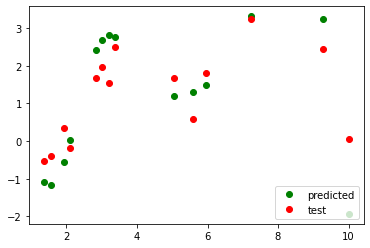

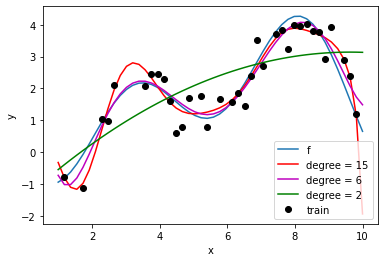

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly2 = PolynomialFeatures(degree=15)
poly6 = PolynomialFeatures(degree=6)
poly15 = PolynomialFeatures(degree=2)

xnew2 = poly2.fit_transform(x)
xnew6 = poly6.fit_transform(x)
xnew15 = poly15.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew2))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew2)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew2)))+1:len(xnew2)]

xtrain2 = xnew2[indeksi_train,]
xtrain6 = xnew6[indeksi_train,]
xtrain15 = xnew15[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest2 = xnew2[indeksi_test,]
xtest6= xnew6[indeksi_test,]
xtest15 = xnew15[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel2 = lm.LinearRegression()
linearModel2.fit(xtrain2,ytrain)
linearModel6 = lm.LinearRegression()
linearModel6.fit(xtrain6,ytrain)
linearModel15 = lm.LinearRegression()
linearModel15.fit(xtrain15,ytrain)

ytest_p2 = linearModel2.predict(xtest2)
ytest_p6 = linearModel6.predict(xtest6)
ytest_p15 = linearModel15.predict(xtest15)
MSE_test = [mean_squared_error(ytest, ytest_p2),mean_squared_error(ytest,ytest_p6), mean_squared_error(ytest,ytest_p15)]
plt.figure(1)
plt.plot(xtest2[:,1],ytest_p2,'og',label='predicted')
plt.plot(xtest2[:,1],ytest,'or',label='test')

plt.legend(loc = 4)
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel2.predict(xnew2),'r-',label='degree = 15')
plt.plot(x,linearModel6.predict(xnew6),'m-',label='degree = 6')
plt.plot(x,linearModel15.predict(xnew15),'g-',label='degree = 2')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain2[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4) 

print("MSE za degree = [2, 6, 15]: ", MSE_test)

Sto je veci degree bolje ce krivulja pratiti podatke.

# Zadatak 6.

Za primjer 4.2. iz priloga koristite veći broj dodatnih veličina u modelu (npr., degree=15). Međutim, umjesto obične
linearne regresije koristite Ridge regresiju. Mijenjate vrijednost regularizacijskog parametar. Što primjećujete? Kako
glase koeficijenti ovog modela, a kako modela iz zadatka 7 za degree = 15. Komentirajte dobivene rezultate.

Theta0:  [[ 0.00000000e+00 -6.67780977e-02 -1.07033458e-01 -8.52824176e-02
   1.98958355e-02  1.27055238e-01  6.84578951e-02 -1.01572235e-01
   2.82451747e-02  2.27278031e-03 -2.92381152e-03  7.34879211e-04
  -9.63607135e-05  7.25346795e-06 -2.97751007e-07  5.18849001e-09]]
Theta1:  [-1.03982742]


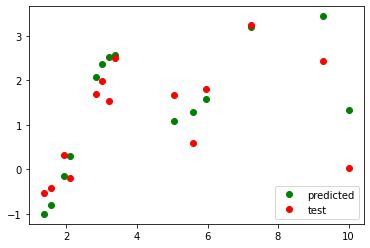

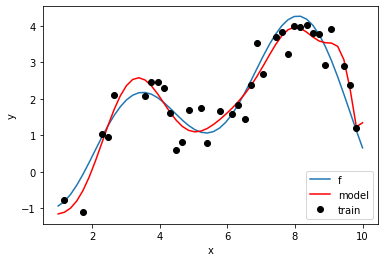

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.Ridge()
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

print("Theta0: ", linearModel.coef_)
print("Theta1: ", linearModel.intercept_)
